In [1]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import equilateral_real, realcontour_nd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from plind_tests.gaussian import Gaussian

%reload_ext autoreload

%autoreload 2


/Users/DylanJow/anaconda/lib/python3.6/site-packages/numba/core/errors.py:149: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
testfunction = Gaussian(2)


In [3]:
# init model
lamb = 1
delta = 0.6
Nstep = 150
dt_init = 8e-3
thresh =-8
tmax = dt_init*Nstep

#%lprun -f realcontour_nd realcontour_nd(5, (-0.5,0.5,-0.5,0.5))

contour = realcontour_nd(10, (-0.5,0.5,-0.5,0.5))


plind = plmodel(contour, testfunction.expfun, grad=testfunction.gradh, expargs=testfunction.expargs)


In [6]:
%%time
plind.descend(delta, thresh, tmax, dt_init)

total steps: 15 current time: 1.279329128647347
CPU times: user 69.8 ms, sys: 2.25 ms, total: 72.1 ms
Wall time: 70.4 ms


/Users/DylanJow/plind/plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


In [17]:
plind.integrate()
print(plind.integral)
print(testfunction.integral(*testfunction.expargs))
print(np.imag(testfunction.integral(*testfunction.expargs))/np.imag(plind.integral))

(6.388689224411193e-08+3.131893843282771j)
3.141592653589793j
1.0030967876921575


In [8]:
len(plind.contour.points)

121

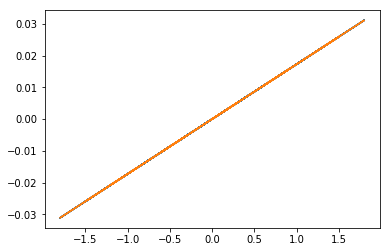

In [9]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

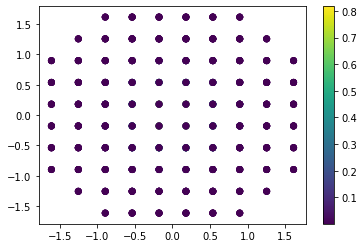

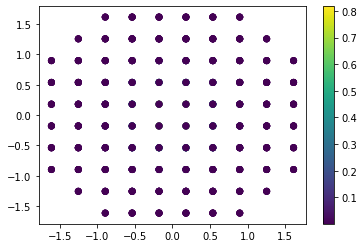

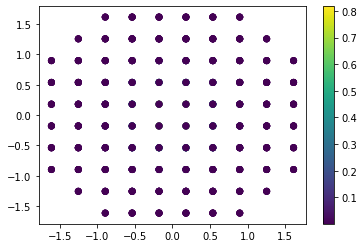

In [307]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])
zs = np.real(plind.contour.points[:,2])

xs = np.imag(plind.contour.points[:,0])
ys = np.imag(plind.contour.points[:,1])
zs = np.imag(plind.contour.points[:,2])
intvals = np.array([intfun(p, lamb) for p in plind.contour.points])
#triang = mtri.Triangulation(xs,ys,plind.contour.simplices)

plt.figure()
plt.scatter(xs, ys, c=intvals.real)
#plt.triplot(triang, alpha=0.8)
plt.colorbar()
plt.show()


plt.figure()
plt.scatter(xs, zs, c=intvals.real)
plt.colorbar()
plt.show()

plt.figure
plt.scatter(ys,zs,c=intvals.real)
plt.colorbar()
plt.show()